
Assignment on preprocessing of Titanic Dataset and do k-fold cross validation techniques and find accuracy score

In [1]:
#Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Reading dataset

df=pd.read_csv('titanic_dataset.csv')

In [3]:
#Displaying top 5 rows

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Displaying the columns

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Statistical Summary

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Checking Null values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Dropping irrelevant columns
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)


In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# Filling the null values

df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Removed all null values

In [11]:
#Checking Datatypes
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

#### Label Encoding

In [12]:
# Label encoding the categorical columns Sex and Embarked

In [13]:
# Importing Library
from sklearn.preprocessing import LabelEncoder

In [14]:
# label encoding
labelencoder=LabelEncoder()
df['Sex']=labelencoder.fit_transform(df['Sex'])
df['Embarked']=labelencoder.fit_transform(df['Embarked'])

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [16]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [17]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [18]:
# Splitting into feature and target
X=df.drop('Survived',axis=1)
y=df['Survived']

## Machine Learning Model

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#Splitting into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

#### SVM

In [21]:
# Importing SVC from sklearn.svm

from sklearn.svm import SVC

In [22]:
#Fitting the svm model

svm=SVC(kernel='linear')
svm=svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,y_pred_svm)

0.7847533632286996

#### k-fold cross validation (SVM)

In [25]:
from sklearn.model_selection import KFold

In [26]:
kfold=KFold(10)

In [27]:
kfold.split(X,y)

<generator object _BaseKFold.split at 0x000001D48FD44F90>

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cv_score=cross_val_score(svm,X,y,cv=kfold)

In [30]:
cv_score

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [31]:
np.mean(cv_score)

0.786729088639201

#### Stratified k-fold cross-validation (SVM)

In [32]:
from sklearn.model_selection import StratifiedKFold

In [33]:
skfold=StratifiedKFold(n_splits=10)

In [34]:
skfold.split(X,y)

<generator object _BaseKFold.split at 0x000001D48FD90AC0>

In [35]:
skcv_value=cross_val_score(svm,X,y,cv=skfold)

In [36]:
skcv_value

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [37]:
np.mean(skcv_value)

0.786729088639201

#### kNN Model

In [38]:
from sklearn.neighbors import KNeighborsClassifier


In [39]:
metric_k=[]
neighbors= range(3,15)

for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier= classifier.fit(X_train,y_train)
    y_pred_kNN= classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [40]:

metric_k

[0.7219730941704036,
 0.6816143497757847,
 0.7085201793721974,
 0.7174887892376681,
 0.6995515695067265,
 0.7085201793721974,
 0.695067264573991,
 0.7040358744394619,
 0.7040358744394619,
 0.6995515695067265,
 0.6905829596412556,
 0.7040358744394619]

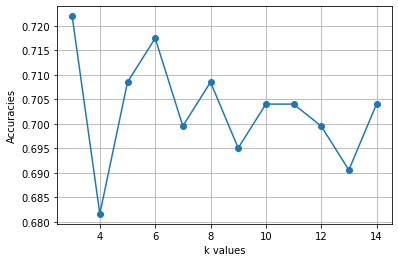

In [41]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [42]:
classifier= KNeighborsClassifier(n_neighbors=3)
classifier= classifier.fit(X_train,y_train)
y_pred_kNN= classifier.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred_kNN)

0.7219730941704036

#### kNN k-fold cross validation

In [44]:
kfold_value=KFold(10)

In [45]:
kfold_value.split(X,y)

<generator object _BaseKFold.split at 0x000001D4906424A0>

In [46]:
cv_score1=cross_val_score(classifier,X,y,cv=kfold_value)

In [47]:
cv_score1

array([0.65555556, 0.69662921, 0.69662921, 0.70786517, 0.76404494,
       0.74157303, 0.74157303, 0.70786517, 0.69662921, 0.79775281])

In [48]:
np.mean(cv_score1)

0.7206117353308364

#### Stratified k-fold cross validation (kNN)

In [49]:
skfold_valid=StratifiedKFold(n_splits=10)

In [50]:
skfold_valid.split(X,y)

<generator object _BaseKFold.split at 0x000001D490642A50>

In [51]:
skcv_score=cross_val_score(classifier,X,y,cv=skfold_valid)

In [52]:
skcv_score

array([0.66666667, 0.6741573 , 0.69662921, 0.75280899, 0.7752809 ,
       0.73033708, 0.76404494, 0.73033708, 0.65168539, 0.78651685])

In [53]:
np.mean(skcv_score)

0.7228464419475655

Accuracy of SVM Model                                            - 0.78475336322869                                              
Accuracy of SVM model with k-fold cross validation               - 0.786729088639201                                            
Accuracy of SVM model with Stratified k-fold cross-validation    - 0.786729088639201                                            
Accuracy of kNN model                                            - 0.7219730941704036                                            
Accuracy of kNN model with k-fold cross validation               - 0.7206117353308364                                            
Accuracy of kNN model with stratified k-fold cross validation    - 0.7228464419475655